In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image



def load_images(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        images.append(img)
        filenames.append(filename)
    return images, filenames

In [3]:
folder = "./data/images"
images, names = load_images(folder)

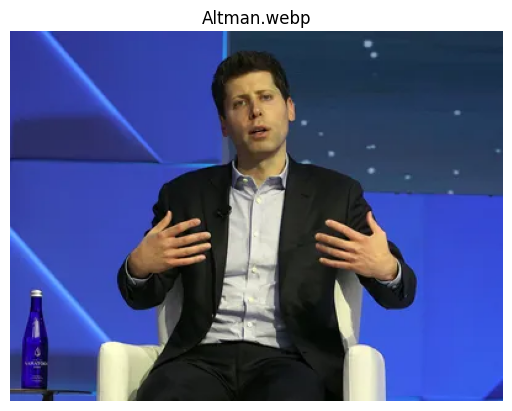

In [4]:
def show_image(image, name):
    plt.imshow(image)
    plt.title(name)
    plt.axis("off")
    plt.show()
show_image(images[0], names[0])

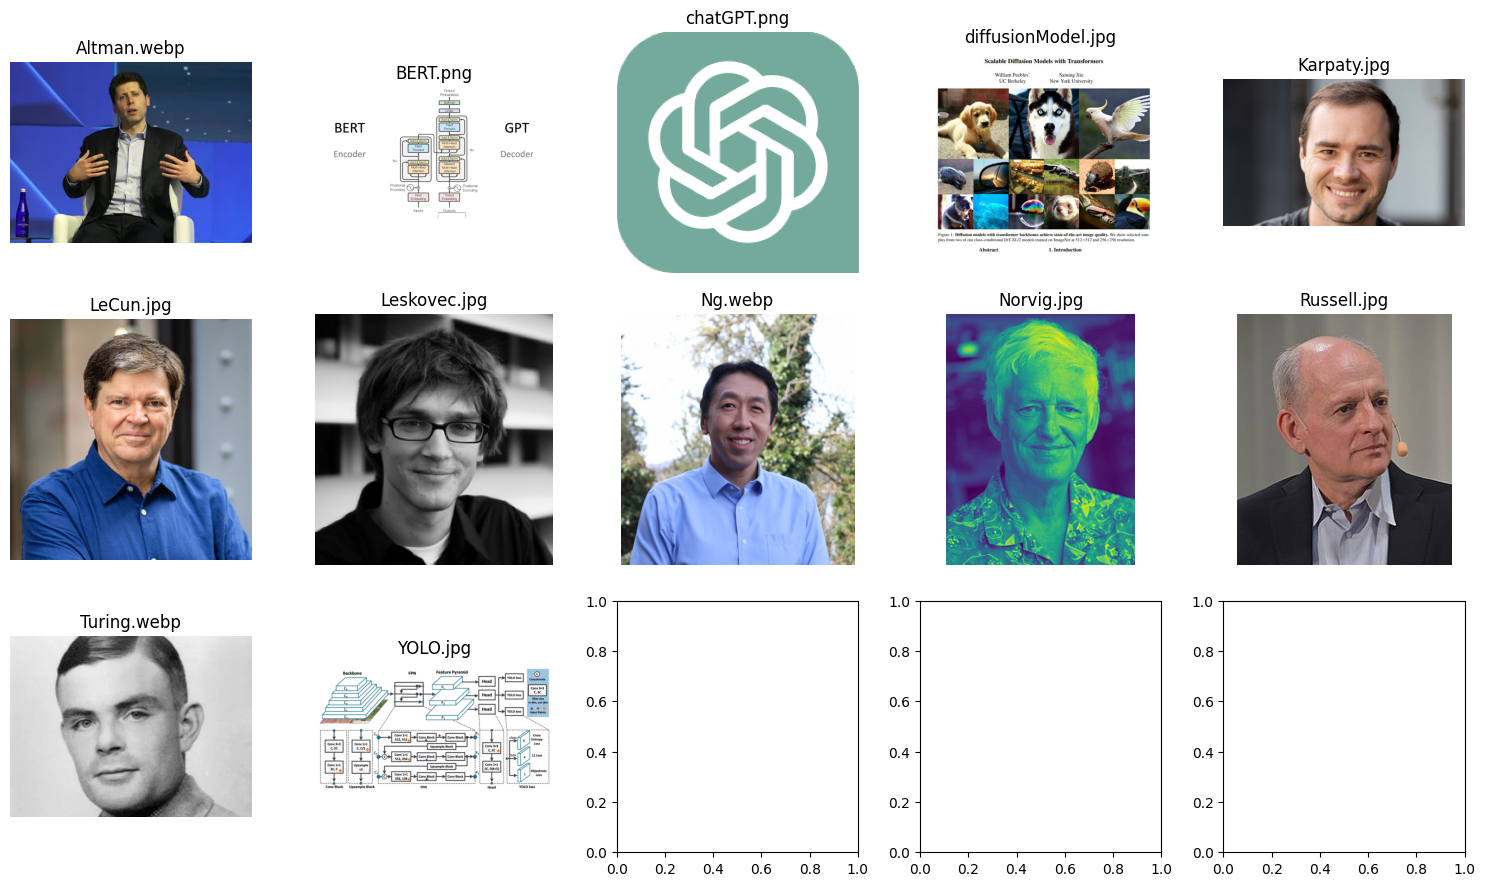

In [5]:
def display_images(images, titles, columns=5):
    rows = (len(images) + columns - 1) // columns
    fig, axes = plt.subplots(rows, columns, figsize=(columns * 3, rows * 3))
    axes = axes.ravel()
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img)
        axes[i].set_title(title)
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()
display_images(images, names)

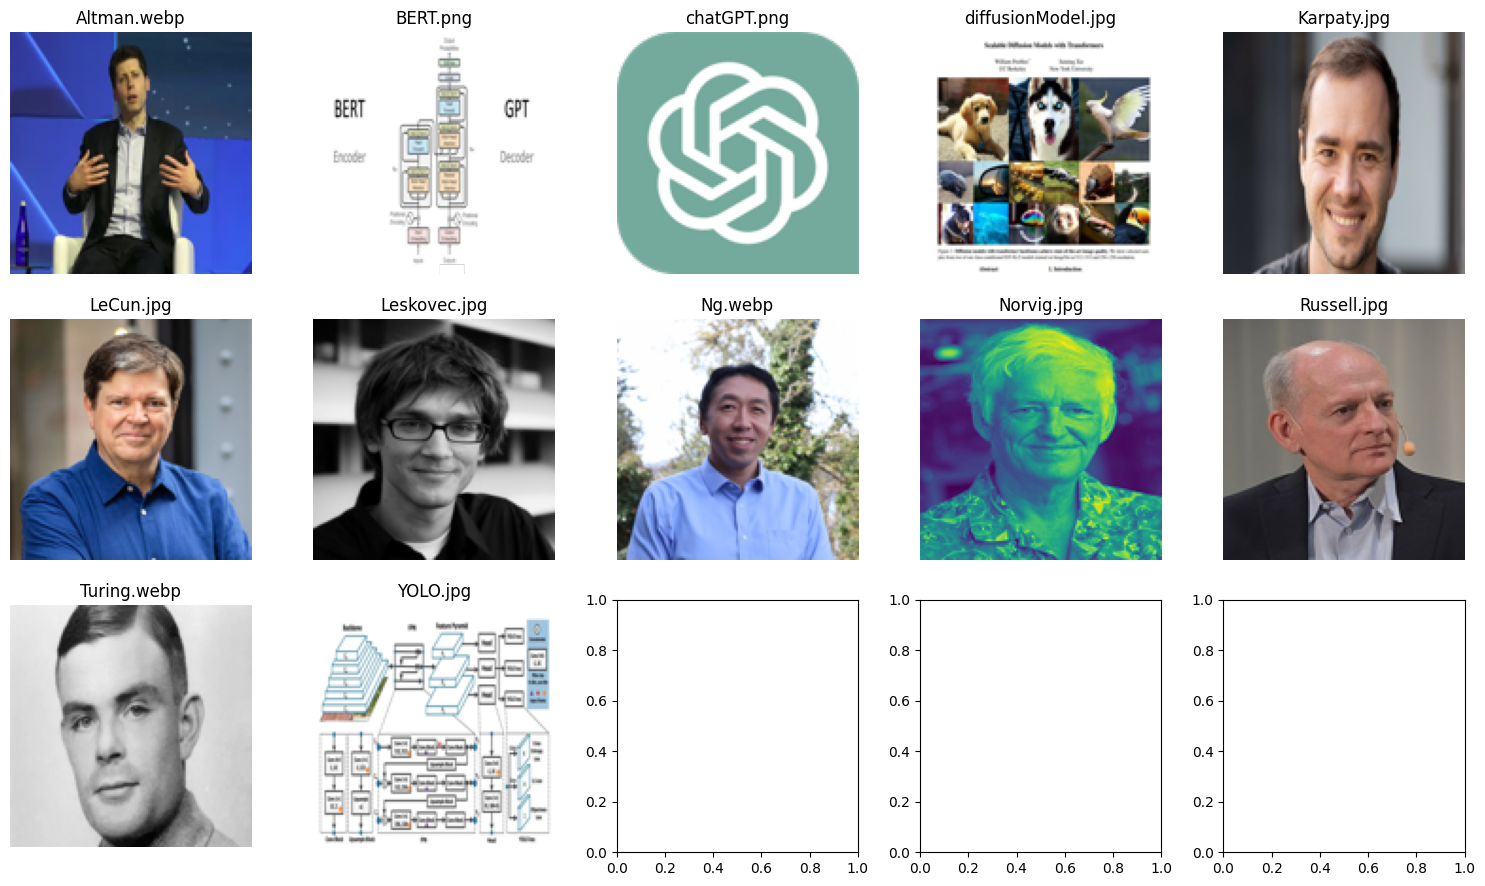

In [6]:
resized_images = [img.resize((128, 128)) for img in images]
display_images(resized_images, names)

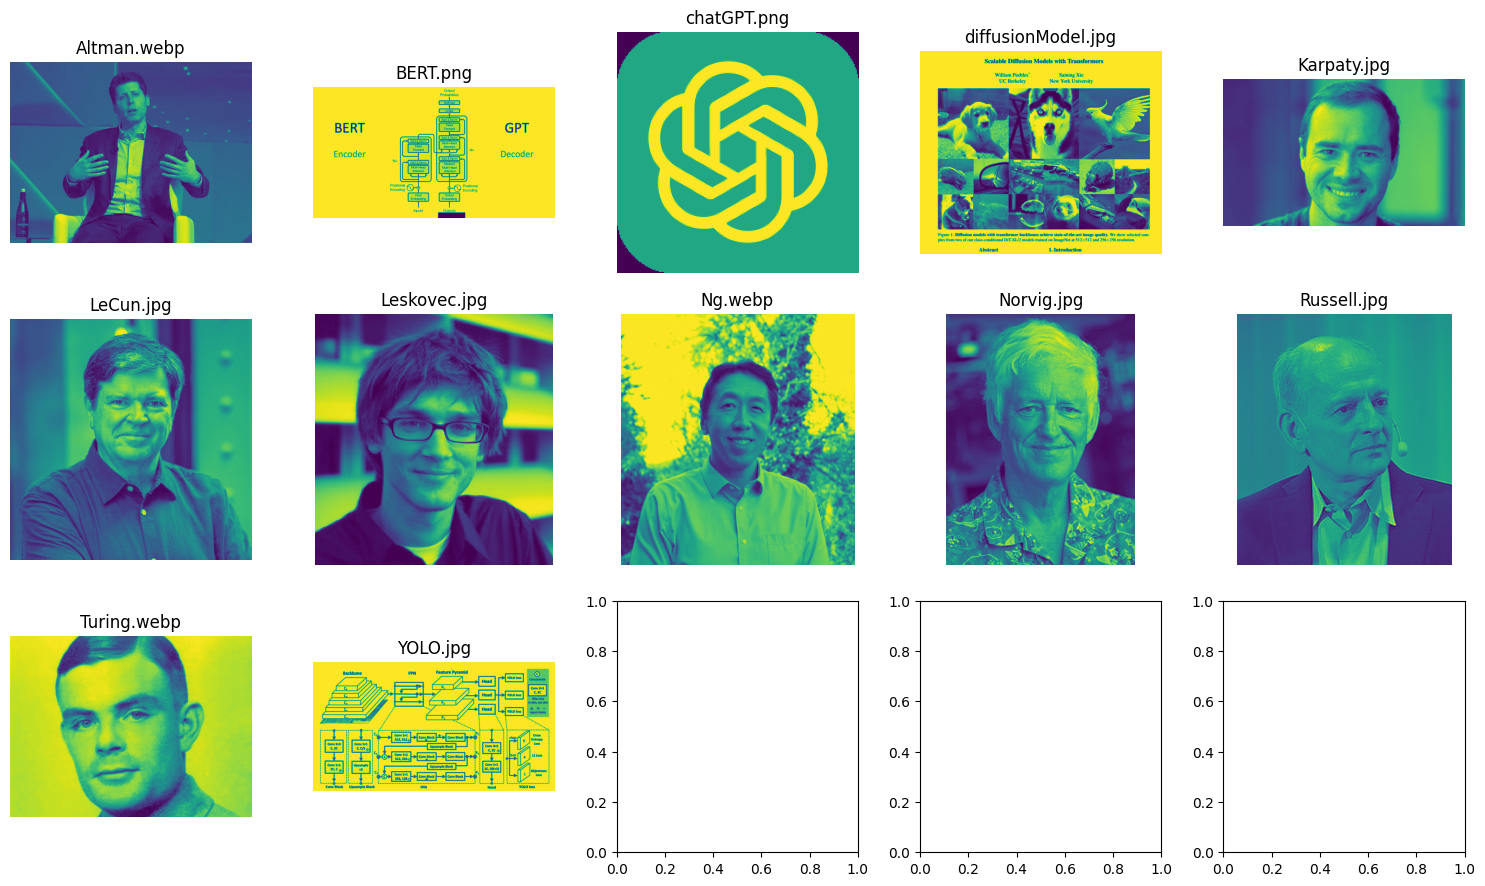

In [7]:
grey_images = [img.convert("L") for img in images]
display_images(grey_images, names)

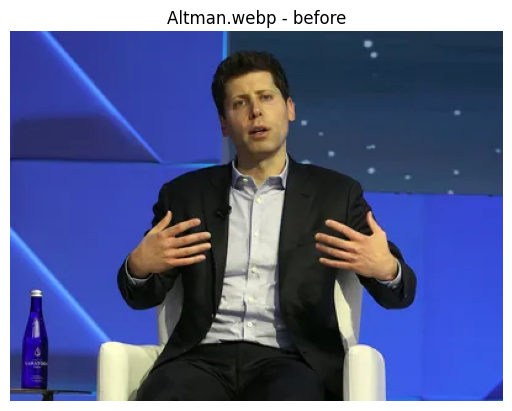

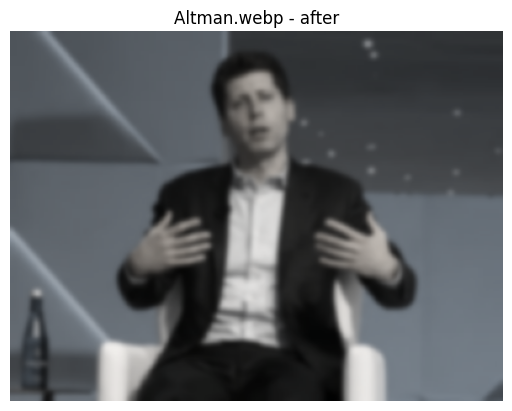

In [8]:
from scipy.ndimage import gaussian_filter
img_cv = np.array(images[0])
blurred = gaussian_filter(img_cv, 2)

show_image(images[0], f"{names[0]} - before")
show_image(Image.fromarray(blurred), f"{names[0]} - after")

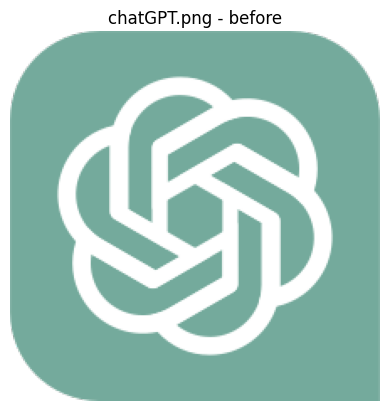

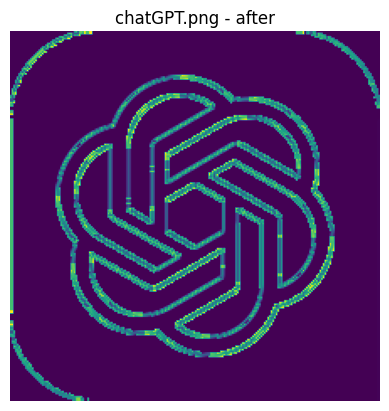

In [9]:
from scipy.ndimage import sobel
img_gray = np.array(images[2].convert("L"))
edges_x = sobel(img_gray, axis=0)
edges_y = sobel(img_gray, axis=1)
edges = np.hypot(edges_x, edges_y)
edges = (edges / edges.max() * 255).astype(np.uint8)

show_image(images[2], f"{names[2]} - before")
show_image(Image.fromarray(edges), f"{names[2]} - after")


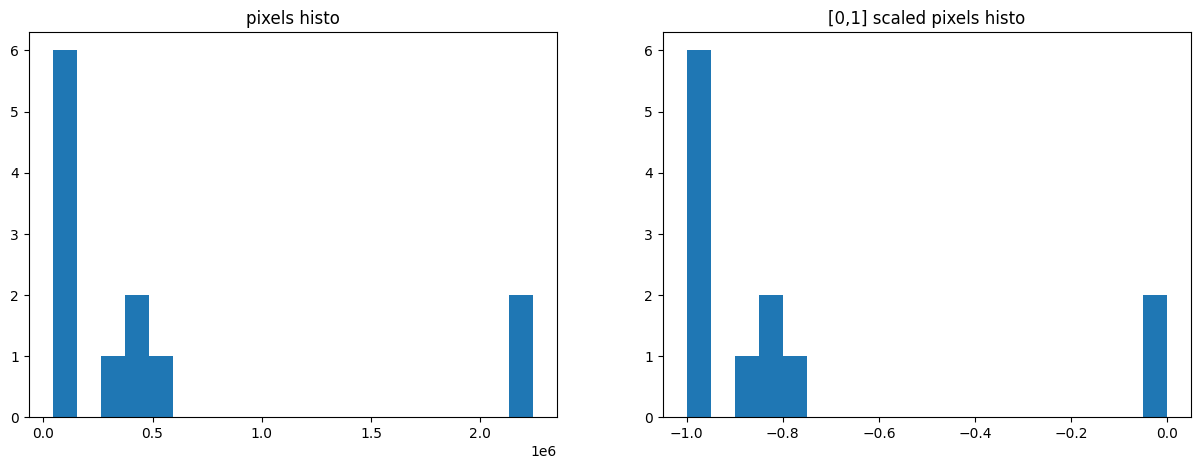

In [13]:
pixels_with_outliers = [img.size[0] * img.size[1] for img in images]
pixels = [x for x in pixels_with_outliers if x not in{}]
max_pi = max(pixels)
min_pi = min(pixels)

normalized_pixels = [(pi - max_pi)/(max_pi - min_pi) for pi in pixels]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(pixels, 20)
ax1.set_title('pixels histo')
ax2.hist(normalized_pixels, 20)
ax2.set_title('[0,1] scaled pixels histo')
plt.show()